#### PDE and Programming – 1

In [1]:
import numpy as np

In [2]:
def heateq(T, t, x, dx):
    alpha = 1
    dudt = np.zeros(len(T))

    source = (np.pi **2 - 1) * np.exp(-t) * np.sin(np.pi * x)
    #central diff.
    dudt[1:-1] = (T[:-2] - 2*T[1:-1] + T[2:])/dx**2 + source[1:-1]
    
    return dudt

In [3]:
def Euler(t0, y0, nt, dt, f, x, dx):
    y_window = [y0]
    t_window = [t0]
    y = y0
    
    for i in range(nt):
        t = t0 + dt * (i + 1)
        rhs = f(y, t, x, dx)
        y = y + dt * rhs

        t_window.append(t)
        y_window.append(y)
    return t_window, y_window

In [4]:
x0 = 0
xmax = 1

t0 = 0
nt = 2001
dt = 0.001
dx = 0.05
nx = int((xmax - x0)/dx + 1)

x = np.linspace(x0, xmax, nx)

# initial condition
T = np.sin(np.pi * x)
# Boundary condition
T[0], T[-1] = 0, 0

# solve Heat Equation
t = t0
t,T = Euler(t, T, nt, dt, heateq, x, dx)


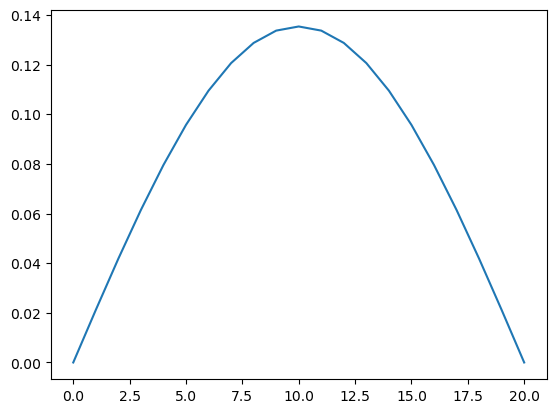

In [11]:
import matplotlib.pyplot as plt
plt.plot(T[-1])

In [6]:
def RK4(t0, y0, nt, dt, f, x, dx):
    t_window = [t0]
    y_window = [y0]
    y = y0
    t = t0
    for i in range(nt):
        t = t0 + dt *(i+1)

        k1 = dt*f(y, t, x, dx)
        k2 = dt*f(y+k1/2, t+dt/2, x, dx)
        k3 = dt*f(y+k2/2, t+dt/2, x, dx)
        k4 = dt*f(y+k3, t+dt, x, dx)

        y = y + k1/6 + k2/3 + k3/3 + k4/6
        t_window.append(t)
        y_window.append(y)
    
    return t_window, y_window

In [7]:
def waveeq(u, t, x, dx):
    c = 1
    dudt = np.zeros(len(u))

    #central diff.
    dudt[1:-1] = -c*(u[2:] - u[:-2])/dx

    #boundary condition
    dudt[0] = -c *(u[1] - u[-1])/dx
    dudt[-1] = -c*(u[0] - u[-2])/dx

    return dudt

In [8]:
x0, xmax, t0, dt, dx = 0, 0.75, 0, 0.01, 0.01
nx = int((xmax-x0)/dx + 1)
nt = 21

x = np.linspace(x0, xmax, nx)

# initial condition
u = np.exp(-200 * (x-0.25)**2)
# boundary condition
u[0] = 0

# solve the wave equation
t = t0
t_E,u_E = Euler(t, u, nt, dt, waveeq, x, dx)
t_RK4,u_RK4 = RK4(t, u, nt, dt, waveeq, x, dx)

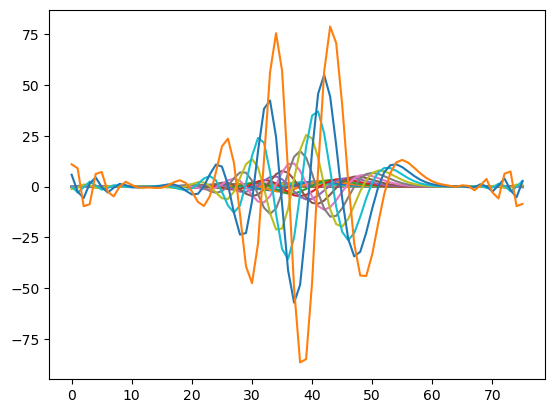

In [9]:
for i in range(len(t_E)):
    plt.plot(u_E[i])

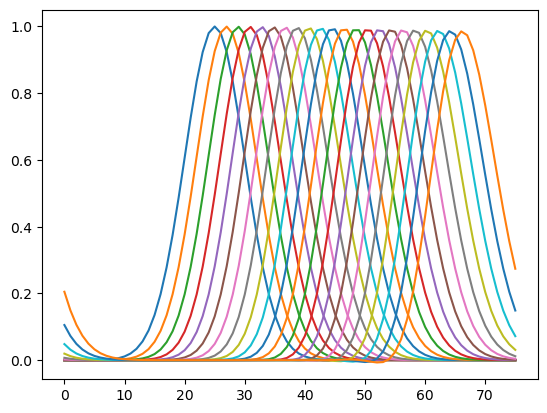

In [10]:
for i in range(len(t_RK4)):
    plt.plot(u_RK4[i])

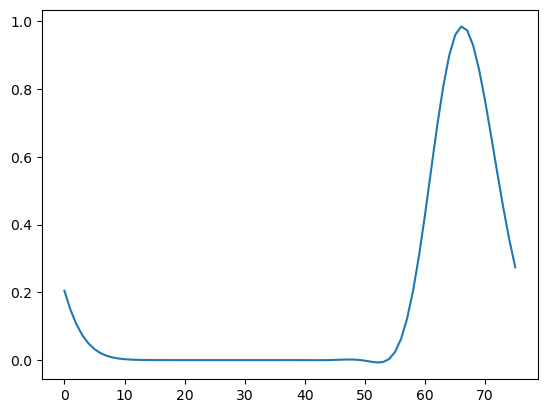

In [12]:
plt.plot(u_RK4[-1])